In [1]:
import matplotlib
import random
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
class TrafficSimulator(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 184.
    
    #init is sued method to create attributes of this class
    def __init__(self, length=50, density=0.2, pdown = 0.5, v_max = 5):
        self.length = length #length of the highway
        self.density = density #density of car
        self.v_max = v_max #max speed allowed on the highway
        self.pdown = pdown #probability of cars slowing down their speed
        self.count = 0 #traffic flow
        self.time = 0 #time step



        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = list([0]*self.length)

    #randomize the first state of the highway
    def initialize(self):

        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        

        self.current_state = -np.ones(self.length, dtype=int)  # fill the road with all empty cells (-1)

#         randommize cells to fill cars in
        random_indices = np.random.choice(
            range(self.length),
            size=int(round(self.density * self.length)),
            replace=False)

#         fill cars in 
        self.current_state[random_indices] = np.random.randint(
            0, self.v_max + 1, size=len(random_indices))





    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        print(''.join('.' if x == -1 else str(int(x)) for x in self.current_state))


    def step(self):
        '''
        Update the state of the cellular automaton.
        '''


        for i in range(0, self.length):
            #if current cenn is not a car
            if self.current_state[i] == -1:
                pass
            else:
                space = 0
                #find space ahead
                for j in range(1,7):
                    if self.current_state[(i+j)%self.length] == -1:
                        space += 1
                    else:
                        space += 1
                        break
                
                    #accelerate.
                    #we dont need to consider space here becasue #deceleration below will consider this factor
                if self.current_state[i] < self.v_max:
                    self.current_state[i] = self.current_state[i] + 1
                    
                    #decelerate
                if space <= self.current_state[i]: 
                        self.current_state[i] = space - 1
                    
                    #randomized slowing down
                if rd.random() <= self.pdown and self.current_state[i] > 0:
                    self.current_state[i] = self.current_state[i] - 1
                
                #update traffic flow
                #Take the last cell as the obervatory point. 
                #If a car goes past this point, increase count (traffic flow) by one
                if i+self.current_state[i] >= self.length:
                    self.count += 1


        #Create a new space of all -1 elements to store the next state, pass this result the self.current_state
        new_state = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.current_state[i] != -1:
                new_state[(i + self.current_state[i]) % self.length] = self.current_state[i]
        self.current_state = new_state


        #assign next state to current state
        self.time += 1

In [3]:
for i in range(1,10,1): #i/10 is the density 
    #assign sim as an instance of TrafficSimulator class
    sim = TrafficSimulator(density=i/10, length = 100, v_max = 5)
    sim.initialize()
    sim.draw()
    print('')
    print('First 18 states with the density = ',i/10)
    #run 18 first step of the simluation at every value of car density
    for i in range(18):
        sim.step()
        sim.draw()


........................1....5.0......3...1....................2.......5......2.51..................

First 18 states with the density =  0.1
..........................2...1.1........3.1.....................2..........5.0.0.1.................
.............................3.1.1........1.1......................2........0..10...2...............
..............................1.1.1........1..2......................2.......1.0.1.....3............
..............................0.0..1.........2...3......................3....0..1..2.......4........
..............................0..1..1..........2....3.......................4.1...2..2..........5...
4.............................0...1..1...........2......4...................0...2...2..2............
.....5........................0.....2..2...........2........4................1....2...2..2..........
..........5...................0.......2...3..........2...........5............1.....2..1....3.......
...............5...............1........2....3....

In [19]:
#the following visualization codes have the same structure, so there is code annotation for this cell only
data_flow = [] # a list to store average traffic flow after 500 time steps (y axis in the graph)
data_density = [] # a list to keep track density values, also functions as x axis of the graph 
# a list of density values at which traffic flow will be calculated.
# This list is fragmented becasue there are many low density values to be examined to produce a zoomed-in graph
for density in np.concatenate((
    np.arange(0.01, 0.079, 0.02), [0.08],
    np.arange(0.09, 0.109, 0.002),
    [0.11, 0.115, 0.12, 0.13, 0.14],
    np.arange(0.15, 1.05, 0.05) 
)):
     # append the currently examined density value to the data_density list
    data_density.append(density)
    # add a sublist to the data_flow list to store many traffic flow values 
    # because there are 100 traffic flow will be produced at a density value
    data_flow.append([])
    #create 100 loops to produce 100 traffic flow values
    for run in range(100):
        #determine the setting of the simulation
        sim = TrafficSimulator(density=density, length = 100, v_max = 5)
        sim.initialize()
        #run 500 time step
        for i in range(500):
            sim.step()
        #add the average traffic flow in 500 time step to the latest sublist in data_flow list
        data_flow[-1].append(sim.count/sim.time)

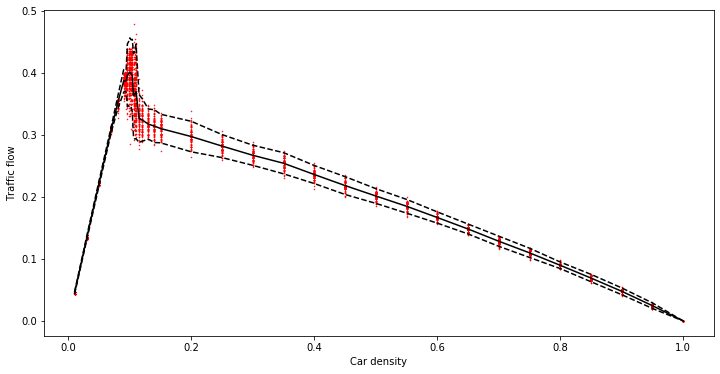

In [37]:
# The structure of all visualization codes below is similar, only this code is annotated
m_1lane_100 = np.mean(np.array(data_flow), axis=1) #mean of the traffic flow
s_1lane_100 = np.std(np.array(data_flow), axis=1) #standard deviation of the traffic flow
plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1) #scatter plots of traffic flows at a density value
plt.plot(data_density, m_1lane_100, 'k-') #plot the mean line of traffic flow
plt.plot(data_density, m_1lane_100 + 1.96*s_1lane_100, 'k--') #plot the 97.5% percentile line of the traffic flow
plt.plot(data_density, m_1lane_100 - 1.96*s_1lane_100, 'k--') #plot the 2.5% percentile line of the traffic flow
plt.xlabel('Car density') #add label
plt.ylabel('Traffic flow')
plt.show()

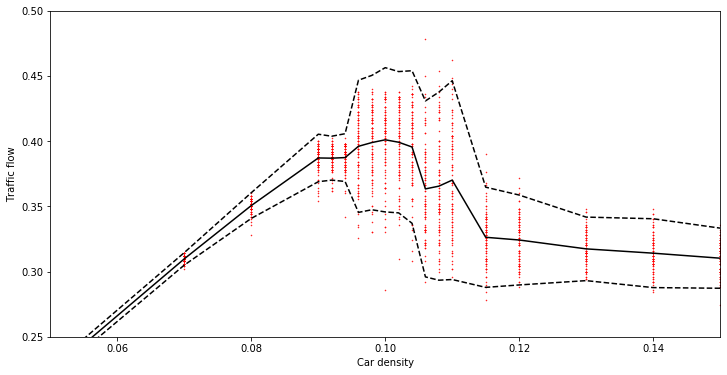

In [38]:
m_1lane_100 = np.mean(np.array(data_flow), axis=1)
s_1lane_100 = np.std(np.array(data_flow), axis=1)

plt.figure(figsize=(12, 6))
plt.plot(data_density, data_flow, 'r.', markersize=1)
plt.plot(data_density, m_1lane_100, 'k-')
plt.plot(data_density, m_1lane_100 + 1.96*s_1lane_100, 'k--')
plt.plot(data_density, m_1lane_100 - 1.96*s_1lane_100, 'k--')
# Zoom in on critical region
plt.xlim(0.05, 0.15)
plt.ylim(0.25, 0.5)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.show()

In [22]:
data_flow2 = []
data_density2 = []
for density in np.concatenate((
    np.arange(0.01, 0.079, 0.02), [0.08],
    np.arange(0.09, 0.109, 0.002),
    [0.11, 0.115, 0.12, 0.13, 0.14],
    np.arange(0.15, 1.05, 0.05)
)):
    #print('Density:', density)
    data_density2.append(density)
    data_flow2.append([])
    for run in range(100):
        sim = TrafficSimulator(density=density, length = 200, v_max = 5)
        sim.initialize()
        for i in range(500):
            sim.step()
        data_flow2[-1].append(sim.count/sim.time)

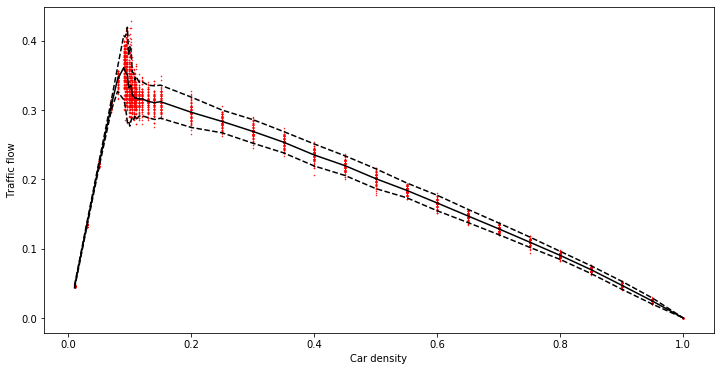

In [39]:
m_1lane_200 = np.mean(np.array(data_flow2), axis=1)
s_1lane_200 = np.std(np.array(data_flow2), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_density2, data_flow2, 'r.', markersize=1)
plt.plot(data_density2, m_1lane_200, 'k-')
plt.plot(data_density2, m_1lane_200 + 1.96*s_1lane_200, 'k--')
plt.plot(data_density2, m_1lane_200 - 1.96*s_1lane_200, 'k--')
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.show()

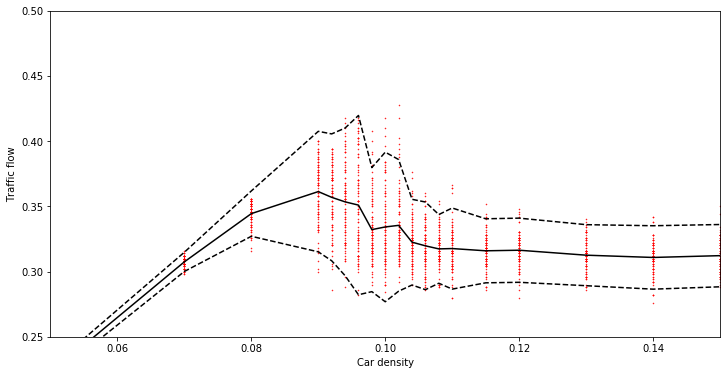

In [41]:
m_1lane_200 = np.mean(np.array(data_flow2), axis=1)
s_1lane_200 = np.std(np.array(data_flow2), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_density2, data_flow2, 'r.', markersize=1)
plt.plot(data_density2, m_1lane_200, 'k-')
plt.plot(data_density2, m_1lane_200 + 1.96*s_1lane_200, 'k--')
plt.plot(data_density2, m_1lane_200 - 1.96*s_1lane_200, 'k--')
# Zoom in on critical region
plt.xlim(0.05, 0.15)
plt.ylim(0.25, 0.5)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.show()

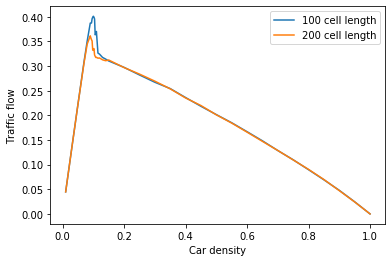

In [45]:
#compare the traffic graph at 2 diffent lenghts of the highway
plt.plot(data_density,m_1lane_100)
plt.plot(data_density2,m_1lane_200)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['100 cell length', '200 cell length'])

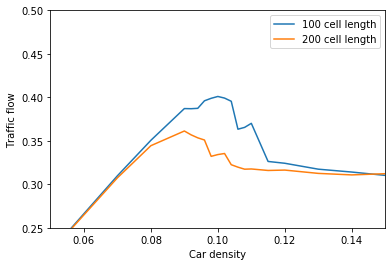

In [46]:
#compare the traffic graph at 2 diffent lenghts of the highway
plt.plot(data_density,m_1lane_100)
plt.plot(data_density2,m_1lane_200)
plt.xlim(0.05, 0.15)
plt.ylim(0.25, 0.5)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['100 cell length', '200 cell length'])
plt.show()

# Two-lane highway simulation

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
class TrafficSimulator_2lane:

    def __init__(self, length=20, car_density=0.1, slow_down_prob=0.5, max_speed=5):
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            length (int) The number of cells in the road. Default: 100.

            car_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            slow_down_prob (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.5.

            max_speed (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
#         np.random.seed(123)
        self.length = length #length of the highway
        self.car_density = car_density #car density on the street
        self.max_speed = max_speed #max speed allowed on the highway
        self.slow_down_prob = slow_down_prob #probability of drivers slowing down by 1 speed unit
        self.count = 0 #traffic flow

        # random cells to fill cars in 2 lanes
        random_indexes_1 = np.random.choice(range(self.length),
                                            size=int(round(car_density * self.length)),
                                            replace=False)
        random_indexes_2 = np.random.choice(range(self.length),
                                            size=int(round(car_density * self.length)),
                                            replace=False)
        
        #fill cars in 2 lanes
        self.state_1 = -np.ones(self.length, dtype=int)  # -1 means empty cell
        self.state_1[random_indexes_1] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes_1))
        
        self.state_2 = -np.ones(self.length, dtype=int)  # -1 means empty cell
        self.state_2[random_indexes_2] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes_2))

        # Track the time steps and total number of cars that passed the simulation
        # boundary to estimate average traffic flow.
        self.time = 0
        self.cumulative_traffic_flow = 0.

        
    def step(self):
        '''
        Advance one time step in the simulation.

        Inputs:

            display (bool) Whether to display the state of the simulation. Default: True.
        '''
        # Update car velocities.
        for i in range(self.length):
#             LANE 1
            #if the current cell is not a car
            if self.state_1[i] != -1:
                ahead_same_1 = 1 # The number of empty cells AHEAD  a car in LANE 1
                ahead_other_1 = 1 #The number of empty cells AHEAD in the OTHER lane (lane 2)of a car in LANE 1 
                behind_other_1 = 0 #The number of empty cells BEHIND in the OTHER lane (lane 2) of a car in LANE 1
               # Find space ahead in the same lane
                while self.state_1[(i + ahead_same_1) % self.length] == -1 and ahead_same_1 < self.max_speed+1:
                    ahead_same_1 += 1
               # Find the space ahead in the other lane
                while self.state_2[(i + ahead_other_1) % self.length] == -1 and ahead_other_1 < self.max_speed+1:
                    ahead_other_1 += 1
               # Find space behind in the other lane
                while self.state_2[(i - behind_other_1) % self.length] == -1 and behind_other_1 < self.max_speed+1:
                    behind_other_1 += 1
                    
#                 Switch lane
                #if there is not space ahead to speed up & no car less than/equal to 5 space behind in the other lane 
                # and enough space to speed up in the other lane
                if ahead_same_1 < self.state_1[i] + 1 and behind_other_1 >5 and ahead_other_1 > self.state_1[i] + 1:
                    self.state_2[i] = self.state_1[i] + 1
                    self.state_1[i] = -1
#                     Print out to check if switching lane function works
#                     print('car at cell',i,  ' on lane 1 switch to lane 2 and the new speed is',self.state_2[i])

#                 Stay in the same lane
                else:
                    # Acceleration
                    #we dont need to consider space here becasue #deceleration below will consider this factor
                    if self.state_1[i] < self.max_speed:
                        self.state_1[i] += 1
                    # Deceleration
                    if self.state_1[i] >= ahead_same_1:
                        self.state_1[i] = ahead_same_1 - 1
#                     Randomization
                    if (self.state_1[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                        self.state_1[i] -= 1
                        
#             LANE 2:
            if self.state_2[i] != -1:
                ahead_same_2 = 1  # The number of empty cells AHEAD  a car in LANE 1
                ahead_other_2 = 1 #The number of empty cells AHEAD in the OTHER lane (lane 1)of a car in LANE 2 
                behind_other_2 = 0 #The number of empty cells BEHIND in the OTHER lane (lane 1) of a car in LANE 2
                
                # Find space ahead in the same lane
                while self.state_2[(i + ahead_same_2) % self.length] == -1 and ahead_same_2 < self.max_speed+1:
                    ahead_same_2 += 1
                # Find space ahead in the other lane
                while self.state_1[(i + ahead_other_2) % self.length] == -1 and ahead_other_2 < self.max_speed+1:
                    ahead_other_2 += 1
                # Find space behind in the other lane
                while self.state_1[(i - behind_other_2) % self.length] == -1 and behind_other_2 < self.max_speed+1:
                    behind_other_2 += 1
                    
#                 Switch lane
                if ahead_same_2 < self.state_2[i] + 1 and behind_other_2 > 5 and ahead_other_2 > self.state_2[i] + 1:
                    self.state_1[i] = self.state_2[i] +1
                    self.state_2[i] = -1
#                     print('car at cel',i,  ' on lane 2 switch to lane 1 and the new speed is',self.state_1[i])
#                 Stay in the same lane 
                else:
                    # Acceleration
                    if self.state_2[i] < self.max_speed:
                        self.state_2[i] += 1
                    # Deceleration
                    if self.state_2[i] >= ahead_same_2:
                        self.state_2[i] = ahead_same_2 - 1
#                     Randomization
                    if (self.state_2[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                        self.state_2[i] -= 1
            #Update traffic flow
            #Take the last cell as the obervatory point. 
            #If a car goes past this point, increase count (traffic flow) by one
            if i+self.state_1[i] >= self.length:
                    self.count += 1
            if i+self.state_2[i] >= self.length:
                    self.count += 1


        # Move cars forward using their new velocities
        # Create a new space of all -1 elements to store the next state of each lane, 
        # Then pass this result the self.current_state
        new_state_1 = -np.ones(self.length, dtype=int)
        new_state_2 = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.state_1[i] != -1:
                new_state_1[(i + self.state_1[i]) % self.length] = self.state_1[i]
            if self.state_2[i] != -1:
                new_state_2[(i + self.state_2[i]) % self.length] = self.state_2[i]
        self.state_1 = new_state_1
        self.state_2 = new_state_2

        # Update time and traffic flow
        self.time+= 1
        


    def display(self):
        '''
        Print out the current state of the simulation.
        '''
        print(''.join('.' if x == -1 else str(x) for x in self.state_1) + '          ' + ''.join('.' if x == -1 else str(x) for x in self.state_2))
#         print(''.join('.' if x == -1 else str(x) for x in self.state_2))

In [36]:
# np.random.seed()
density = [i/10 for i in range(1,11,1)]
for p in density:
    sim = TrafficSimulator_2lane(car_density = p, length = 50)
    print('Car density is', p)
    for i in range(18):
        sim.step()
        sim.display()
    print('')


Car density is 0.1
....4..............4...2..........3.........3.....          .1......2.....5......................3.......2....
........4.............3...3...........4.........4.          ...2......2.......4.....................3.......3.
..4..........5..........2....3.............5......          ..4...3......3.........5...................3......
.......5.........4.........3.....4..............5.          ....2.....4.....3...........5..................4..
..4.........5........4.........4......5...........          ..5...2........5...3............4.................
......4.........4.........5.........5......5......          ....2....3.......2.....4.............5............
...........5.........5.........5........4......4..          ......2.....3......2........5............4........
..5.............5........4.........4........4.....          .........3.....3......3.........4.............5...
......4.............4.........5........4.........5          .5...........4....3......3.......

In [13]:
data_2lane_flow = []
data_2lane_density = []
for density in np.concatenate((
    np.arange(0.01, 0.079, 0.02), [0.08],
    np.arange(0.09, 0.109, 0.002),
    [0.11, 0.115, 0.12, 0.13, 0.14],
    np.arange(0.15, 1.05, 0.05)
)):
    #print('Density:', density)
    data_2lane_density.append(density)
    data_2lane_flow.append([])
    for run in range(100):
        sim = TrafficSimulator_2lane(car_density=density, length = 100, max_speed = 5)
        for i in range(100):
            sim.step()
        data_2lane_flow[-1].append(sim.count/sim.time)

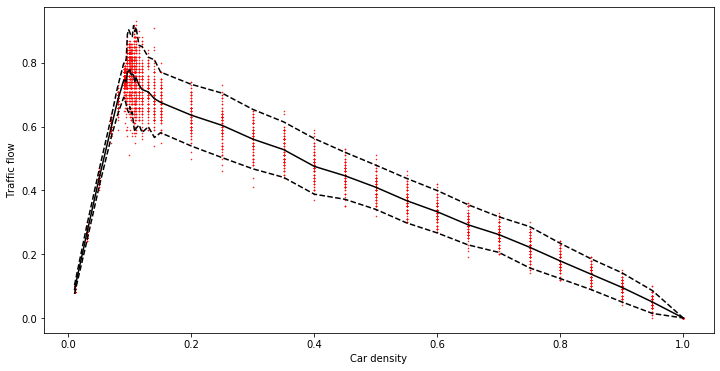

In [48]:
m_2lane_100 = np.mean(np.array(data_2lane_flow), axis=1)
s_2lane_100 = np.std(np.array(data_2lane_flow), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_2lane_density, data_2lane_flow, 'r.', markersize=1)
plt.plot(data_2lane_density, m_2lane_100, 'k-')
plt.plot(data_2lane_density, m_2lane_100 + 1.96*s_2lane_100, 'k--')
plt.plot(data_2lane_density, m_2lane_100 - 1.96*s_2lane_100, 'k--')
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.show()

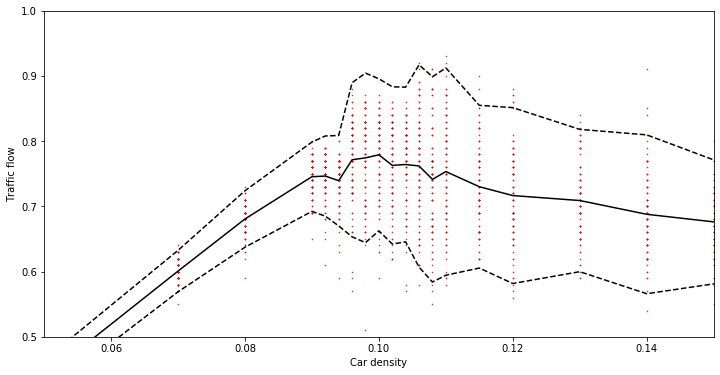

In [47]:
m_2lane_100 = np.mean(np.array(data_2lane_flow), axis=1)
s_2lane_100 = np.std(np.array(data_2lane_flow), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_2lane_density, data_2lane_flow, 'r.', markersize=1)
plt.plot(data_2lane_density, m_2lane_100, 'k-')
plt.plot(data_2lane_density, m_2lane_100 + 1.96*s_2lane_100, 'k--')
plt.plot(data_2lane_density, m_2lane_100 - 1.96*s_2lane_100, 'k--')
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
# Zoom in on critical region
plt.xlim(0.05, 0.15)
plt.ylim(0.5, 1)
plt.show()

In [16]:
data_2lane_flow2 = []
data_2lane_density2 = []
for density in np.concatenate((
    np.arange(0.01, 0.079, 0.02), [0.08],
    np.arange(0.09, 0.109, 0.002),
    [0.11, 0.115, 0.12, 0.13, 0.14],
    np.arange(0.15, 1.05, 0.05)
)):
    #print('Density:', density)
    data_2lane_density2.append(density)
    data_2lane_flow2.append([])
    for run in range(100):
        sim = TrafficSimulator_2lane(car_density=density, length = 200, max_speed = 5)
        for i in range(100):
            sim.step()
        data_2lane_flow2[-1].append(sim.count/sim.time)

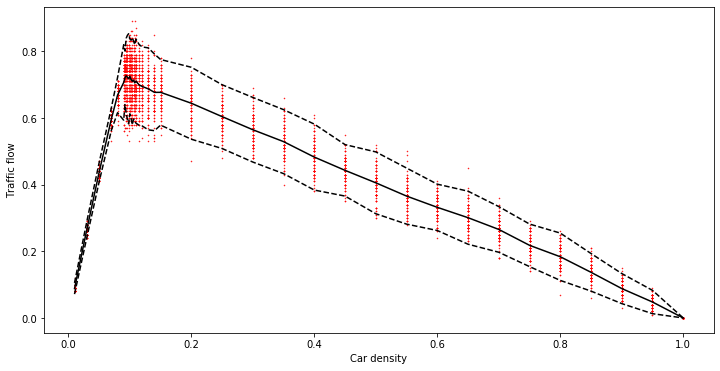

In [49]:
m_2lane_200 = np.mean(np.array(data_2lane_flow2), axis=1)
s_2lane_200 = np.std(np.array(data_2lane_flow2), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_2lane_density2, data_2lane_flow2, 'r.', markersize=1)
plt.plot(data_2lane_density2, m_2lane_200, 'k-')
plt.plot(data_2lane_density2, m_2lane_200 + 1.96*s_2lane_200, 'k--')
plt.plot(data_2lane_density2, m_2lane_200 - 1.96*s_2lane_200, 'k--')
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.show()

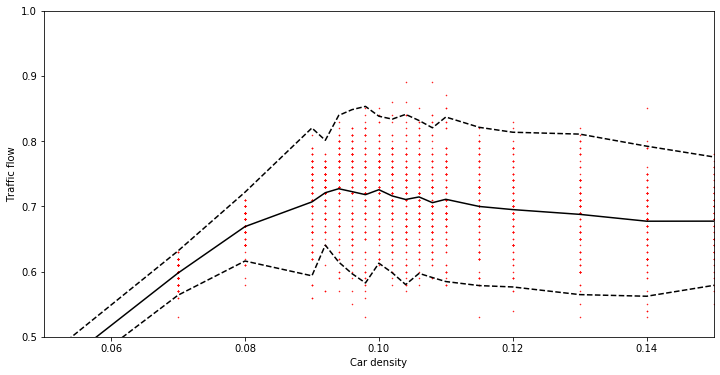

In [50]:

m_2lane_200 = np.mean(np.array(data_2lane_flow2), axis=1)
s_2lane_200 = np.std(np.array(data_2lane_flow2), axis=1)
plt.figure(figsize=(12, 6))
plt.plot(data_2lane_density2, data_2lane_flow2, 'r.', markersize=1)
plt.plot(data_2lane_density2, m_2lane_200, 'k-')
plt.plot(data_2lane_density2, m_2lane_200 + 1.96*s_2lane_200, 'k--')
plt.plot(data_2lane_density2, m_2lane_200 - 1.96*s_2lane_200, 'k--')
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
# Zoom in on critical region
plt.xlim(0.05, 0.15)
plt.ylim(0.5, 1)
plt.show()

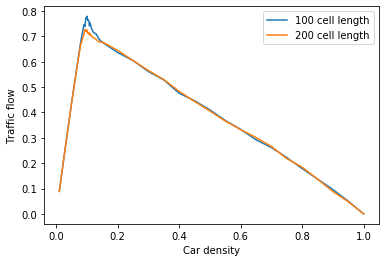

In [53]:
#compare the traffic graph at 2 diffent lenghts of the highway
plt.plot(data_2lane_density,m_2lane_100)
plt.plot(data_2lane_density2,m_2lane_200)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['100 cell length', '200 cell length'])
plt.show()

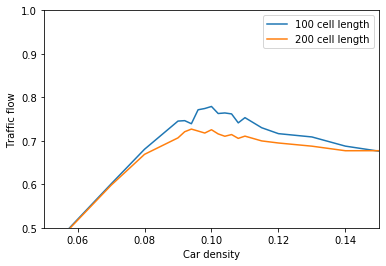

In [52]:
#compare the traffic graph at 2 diffent lenghts of the highway
plt.plot(data_2lane_density,m_2lane_100)
plt.plot(data_2lane_density2,m_2lane_200)
plt.xlim(0.05, 0.15)
plt.ylim(0.5, 1)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['100 cell length', '200 cell length'])
plt.show()

* Obviously, the traffic flow lines in both scenarios have the same shape but the max value as well as at what value of density that max value occurs.

# Compare traffic flow of 2 models


**When the highway is 100 cells long**

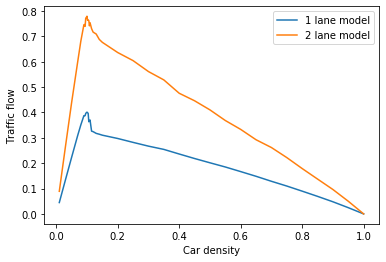

In [54]:
#compare the traffic flow lines of 2 models when the highway is 100 cells long
plt.plot(data_density,m_1lane_100)
plt.plot(data_2lane_density,m_2lane_100)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['1 lane model', '2 lane model'])
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


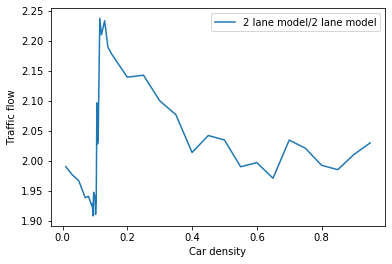

In [55]:
#relative comparison between the traffic flow lines of 2 models when the highway is 100 cell long
plt.plot(data_density,m_2lane_100/m_1lane_100)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['2 lane model/2 lane model'])
plt.show()

**When the cell is 200 cells long**

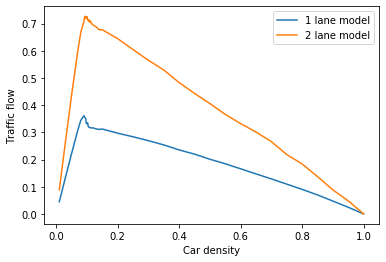

In [56]:
#compare the traffic flow lines of 2 models when the highway is 200 cells long
plt.plot(data_density2,m_1lane_200)
plt.plot(data_2lane_density2,m_2lane_200)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['1 lane model', '2 lane model'])
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


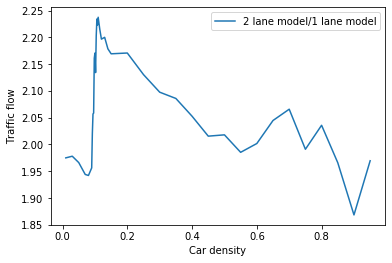

In [57]:
plt.plot(data_density2,m_2lane_200/m_1lane_200)
plt.xlabel('Car density')
plt.ylabel('Traffic flow')
plt.legend(['2 lane model/1 lane model'])
plt.show()